In [2]:
import numpy as np
import pandas as pd
from pylab import *
import scipy.signal as signal
import scipy as sci
import math as ma
#from pykalman import KalmanFilter

In [3]:
dataset1 = pd.read_json("merged_file_acc.json")
dataset1_g = pd.read_json("merged_file_gyro.json")
dataset1_h = pd.read_json("merged_file_heart.json")
dataset1_t = pd.read_json("merged_file_skin.json")
dataset1_s = pd.read_json("merged_file_speed.json")


dataset1 = dataset1.sort_values(by='Timestamp') 
dataset1['Timestamp'] = dataset1['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset1 = dataset1[[5,6,7,8]]

dataset1_g = dataset1_g.sort_values(by='Timestamp') 
dataset1_g['Timestamp'] = dataset1_g['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset1_g = dataset1_g[[1,2,3,8]]

dataset_f = dataset1.merge(dataset1_g,how='left', left_on='Timestamp', right_on='Timestamp')

dataset1_h = dataset1_h.sort_values(by='Timestamp') 
dataset1_h['Timestamp'] = dataset1_h['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset1_h = dataset1_h[[6,3]]

dataset_f = dataset_f.merge(dataset1_h,how='left', left_on='Timestamp', right_on='Timestamp')

dataset1_t = dataset1_t.sort_values(by='Timestamp') 
dataset1_t['Timestamp'] = dataset1_t['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset1_t = dataset1_t[[6,5]]

dataset_f = dataset_f.merge(dataset1_t,how='left', left_on='Timestamp', right_on='Timestamp')

dataset1_s = dataset1_s.sort_values(by='Timestamp')
dataset1_s['Timestamp'] = dataset1_s['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset1_s = dataset1_s[[7,5]]
dataset_f = dataset_f.merge(dataset1_s,how='left', left_on='Timestamp', right_on='Timestamp')

dataset_f = dataset_f.fillna(method='bfill')
dataset_f = dataset_f.fillna(method='pad')

dataset_f

,Timestamp,X,Y,Z,AngularX,AngularY,AngularZ,HeartRate,Temperature,KPH
0,2016-10-14 18:08:46,-0.996094,0.007324,-0.020508,0.396341,-0.396341,0.030488,84.0,31.059999,18.847331
1,2016-10-14 18:08:47,-0.998047,0.008057,-0.024170,0.365854,-0.365854,0.000000,84.0,31.059999,18.847331
2,2016-10-14 18:08:48,-0.994141,0.008545,-0.021973,0.426829,-0.396341,0.030488,84.0,31.059999,18.847331
3,2016-10-14 18:08:49,-0.999023,0.008545,-0.023682,0.396341,-0.426829,0.060976,84.0,31.370001,18.847331
4,2016-10-14 18:08:50,-0.992432,0.010498,-0.021729,0.426829,-0.426829,0.000000,84.0,31.370001,18.847331
5,2016-10-14 18:08:51,-0.993408,0.009766,-0.023926,0.396341,-0.457317,-0.030488,84.0,31.370001,18.847331
6,2016-10-14 18:08:52,-0.997070,0.009277,-0.022949,0.396341,-0.396341,0.030488,84.0,31.370001,18.847331
7,2016-10-14 18:08:53,-1.001221,0.007568,-0.024414,0.335366,-0.365854,0.091463,84.0,31.370001,18.847331
8,2016-10-14 18:08:54,-0.992676,0.009521,-0.023193,0.457317,-0.457317,0.000000,84.0,31.370001,18.847331
9,2016-10-14 18:08:55,-0.992920,0.007568,-0.023682,0.396341,-0.426829,0.060976,84.0,31.370001,18.847331


In [4]:
dataset2 = pd.read_json("merged_file_acc_heb_2.json")
dataset2_g = pd.read_json("merged_file_gyro_heb_2.json")
dataset2_h = pd.read_json("merged_file_heart_heb_2.json")
dataset2_t = pd.read_json("merged_file_skin_heb_2.json")
dataset2_s = pd.read_json("merged_file_speed_heb_2.json")

dataset2 = dataset2.sort_values(by='Timestamp') 
dataset2['Timestamp'] = dataset2['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2 = dataset2[[5,6,7,8]]

dataset2_g = dataset2_g.sort_values(by='Timestamp') 
dataset2_g['Timestamp'] = dataset2_g['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_g = dataset2_g[[1,2,3,8]]

dataset_f2 = dataset2.merge(dataset2_g,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_h = dataset2_h.sort_values(by='Timestamp') 
dataset2_h['Timestamp'] = dataset2_h['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_h = dataset2_h[[6,3]]

dataset_f2 = dataset_f2.merge(dataset2_h,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_t = dataset2_t.sort_values(by='Timestamp') 
dataset2_t['Timestamp'] = dataset2_t['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_t = dataset2_t[[6,5]]

dataset_f2 = dataset_f2.merge(dataset2_t,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_s = dataset2_s.sort_values(by='Timestamp')
dataset2_s['Timestamp'] = dataset2_s['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_s = dataset2_s[[7,5]]
dataset_f2 = dataset_f2.merge(dataset2_s,how='left', left_on='Timestamp', right_on='Timestamp')

dataset_f2 = dataset_f2.fillna(method='bfill')
dataset_f2 = dataset_f2.fillna(method='pad')

dataset_f2

,Timestamp,X,Y,Z,AngularX,AngularY,AngularZ,HeartRate,Temperature,KPH
0,2016-10-15 00:27:10,-0.190430,-0.976074,-0.174805,-5.670732,-3.231707,4.115854,120.0,31.500000,0.000000
1,2016-10-15 00:27:11,-0.235840,-0.986572,-0.089600,-13.719513,-14.512196,8.871951,120.0,31.500000,0.000000
2,2016-10-15 00:27:12,-0.280762,-0.950928,0.053711,12.987805,4.298780,-1.676829,120.0,31.500000,0.000000
3,2016-10-15 00:27:13,-0.331055,-0.927979,0.110107,2.743902,-12.621951,5.884147,120.0,31.500000,0.000000
4,2016-10-15 00:27:14,-0.426514,-0.861328,0.164307,32.103661,16.646341,-3.689024,120.0,31.500000,0.000000
5,2016-10-15 00:27:15,-0.398193,-0.913330,0.135742,9.359756,-0.457317,-1.219512,120.0,31.500000,0.000000
6,2016-10-15 00:27:16,-0.348633,-0.963867,-0.022949,-19.573172,-73.475609,14.878049,70.0,31.500000,0.000000
7,2016-10-15 00:27:17,-0.270020,-0.969727,0.160645,-77.926834,-29.146341,4.908537,70.0,31.500000,0.000000
8,2016-10-16 00:21:20,-0.590088,-0.307861,0.674805,9.115854,-21.250000,19.603659,70.0,31.500000,0.000000
9,2016-10-16 00:21:21,-0.605225,0.364502,0.487793,9.115854,-21.250000,19.603659,70.0,31.500000,0.000000


In [50]:
Num_taps = 10;

In [51]:
a = signal.firwin(Num_taps, cutoff = 0.001, window = "boxcar");

In [52]:
data = dataset_f2.as_matrix();

In [53]:
dataset = dataset_f.as_matrix();
dataset


array([[Timestamp('2016-10-14 18:08:46'), -0.99609375,
        0.007324218749999999, ..., 84.0, 31.059999465942383,
        18.84733074388352],
       [Timestamp('2016-10-14 18:08:47'), -0.9980468750000001,
        0.008056640625, ..., 84.0, 31.059999465942383, 18.84733074388352],
       [Timestamp('2016-10-14 18:08:48'), -0.9941406250000001,
        0.008544921875, ..., 84.0, 31.059999465942383, 18.84733074388352],
       ..., 
       [Timestamp('2016-10-15 00:27:07'), -0.387451171875, -0.943603515625,
        ..., 120.0, 31.969999313354492, 4.159805464986337],
       [Timestamp('2016-10-15 00:27:08'), -0.413330078125, -0.89013671875,
        ..., 120.0, 31.969999313354492, 4.159805464986337],
       [Timestamp('2016-10-15 00:27:09'), -0.431884765625, -0.955322265625,
        ..., 120.0, 31.969999313354492, 4.159805464986337]], dtype=object)

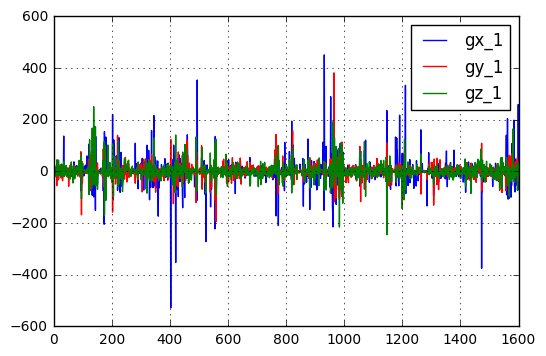

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset = dataset[1000: 2600,:];
ax_1 = dataset[:,1];
ay_1 = dataset[:,2];
az_1 = dataset[:,3];
gx_1 = dataset[:,4];
gy_1 = dataset[:,5];
gz_1 = dataset[:,6];
h_1 = dataset[:,7];
t_1 = dataset[:,8];
s_1 = dataset[:,9]

ax_2 = data[:,1];
ay_2 = data[:,2];
az_2 = data[:,3];
gx_2 = data[:,4];
gy_2 = data[:,5];
gz_2 = data[:,6];
h_2 = data[:,7];
t_2 = data[:,8];
s_2 = data[:,9]



lse = np.linspace(0, len(gx_1), len(gx_1));

plt.figure
plt.plot(lse, gx_1, 'b', lse, gy_1, 'r', lse, gz_1, 'g');
plt.legend(('gx_1','gy_1','gz_1'), loc = 'best');
plt.grid(True);
plt.show();

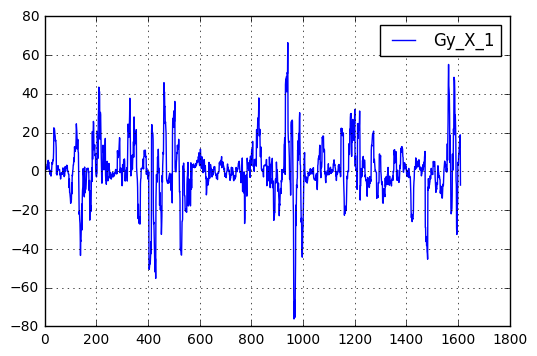

1609

In [55]:
b_x = signal.convolve(ax_1, a, mode='full');
b_y = signal.convolve(ay_1, a, mode='full');
b_z = signal.convolve(az_1, a, mode='full');

fir_g_x_1 = signal.convolve(gx_1, a, mode='full');
fir_g_y_1 = signal.convolve(gy_1, a, mode='full');
fir_g_z_1 = signal.convolve(gz_1, a, mode='full');

ls2 = np.linspace(0, len(fir_g_x_1), len(fir_g_x_1));
lse = np.linspace(0, 100, 100);
plt.figure
#plt.plot( lse, gx_1[700:800], 'r', ls2, fir_g_x_1[700:800], 'b');#fir_g_y_1, 'r', ls2, fir_g_z_1, 'g');
plt.plot(ls2, fir_g_x_1)
plt.legend(('Gy_X_1','Gx_1'), loc = 'best');
plt.grid(True);
plt.show();
len(b_x)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: x and y must have same first dimension

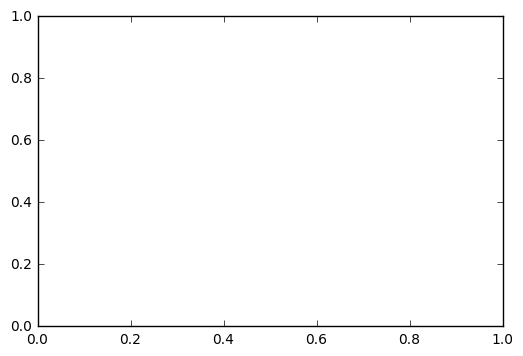

In [49]:
lse = np.linspace(0, 1624, 1624)

plt.figure
plt.plot(lse, b_x, 'b', lse, b_y, 'r', lse, b_z, 'g');
plt.legend(('b_x','b_y','b_z'), loc = 'best');
plt.grid(True);
plt.show();

#plt.plot(b_z);

In [13]:
#dat = dataset[:,1:4] * dataset[:,1:4]
d = np.mean(dataset[:,1:3]**2,axis = 1);
d2 = np.mean(data[:,1:3]**2, axis = 1);

In [14]:
rms_acc = []
rms_acc_2 = []
for i in range (0, len(d)):
    rms_acc.append(ma.sqrt(d[i]));

for i in range (0, len(d2)):
    rms_acc_2.append(ma.sqrt(d2[i]));

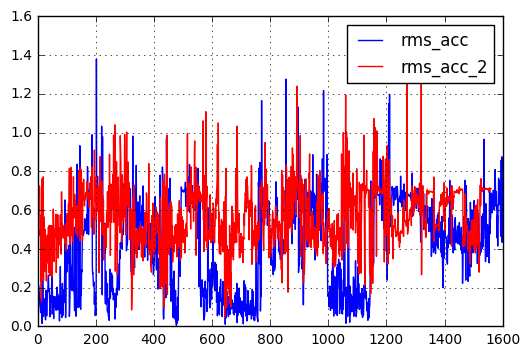

In [15]:
ls1 = np.linspace(0, len(d), len(d));
ls2 = np.linspace(0, len(d2), len(d2));

plt.figure
plt.plot(ls1, rms_acc, 'b', ls2, rms_acc_2, 'r');
plt.legend(('rms_acc','rms_acc_2'), loc = 'best');
plt.grid(True);
plt.show();


In [16]:
no = 25
rm = signal.firwin(no, cutoff = 0.01, window = "boxcar");
rm2 = signal.firwin(no, cutoff = 0.01, window = "boxcar");

In [16]:
filter_rms = signal.convolve(rms_acc, rm, mode='full');
filter_rms_2 = signal.convolve(rms_acc_2, rm2, mode='full');
len(filter_rms_2)

1584

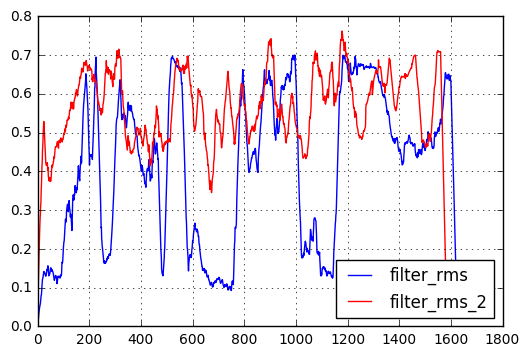

In [17]:
ls1 = np.linspace(0, len(filter_rms), len(filter_rms));
ls2 = np.linspace(0, len(filter_rms_2), len(filter_rms_2));

plt.figure
plt.plot(ls1, filter_rms, 'b', ls2, filter_rms_2, 'r');
plt.legend(('filter_rms','filter_rms_2'), loc = 'best');
plt.grid(True);
plt.show();


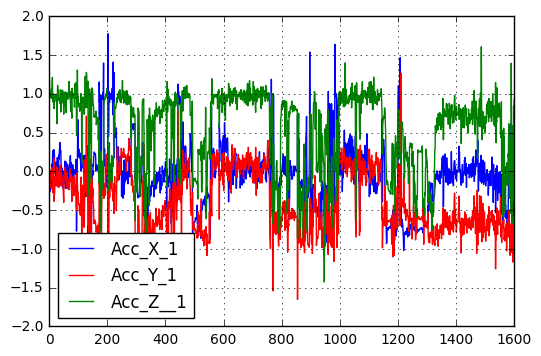

In [18]:
q = signal.medfilt(rms_acc);
w = signal.medfilt(rms_acc_2);
acc_x_1 = signal.medfilt(ax_1);
acc_y_1 = signal.medfilt(ay_1);
acc_z_1 = signal.medfilt(az_1);

g_x_1 = signal.medfilt(gx_1);
g_y_1 = signal.medfilt(gy_1);
g_z_1 = signal.medfilt(gz_1);

ls1 = np.linspace(0, len(acc_x_1), len(acc_x_1));
ls2 = np.linspace(0, len(g_x_1), len(g_x_1));

plt.figure
plt.plot(ls1, acc_x_1, 'b', ls1, acc_y_1, 'r', ls1, acc_z_1, 'g');
plt.legend(('Acc_X_1','Acc_Y_1','Acc_Z__1'), loc = 'best');
plt.grid(True);
plt.show();

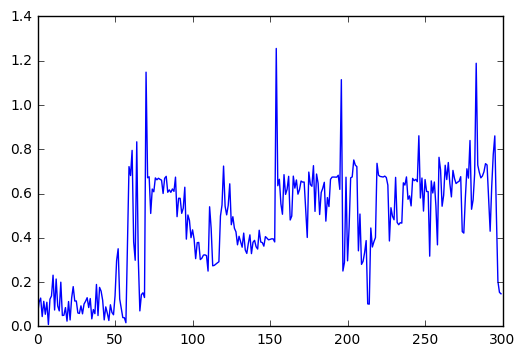

In [19]:
t, y = signal.butter(3, 0.01, 'highpass', analog=True)
filt_1 = signal.filtfilt(t, y, rms_acc);
filt_2 = signal.filtfilt(t, y, rms_acc_2);
#for i in range (0, len(filt_1)):
#    filt_1[i] = (filt_1[i] * 1e+6);
#for i in range (0, len(filt_2)):
#    filt_2[i] = (filt_2[i] * 1e+6);
plt.plot(filt_1[700:1000]);

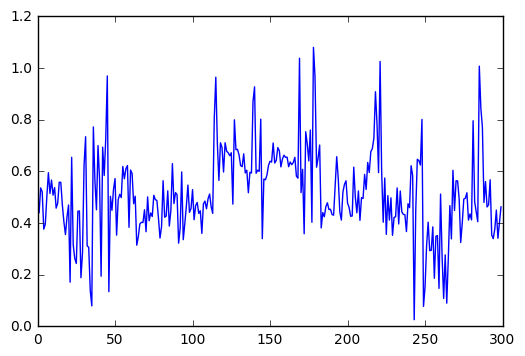

In [20]:
plt.plot(filt_2[400:700])

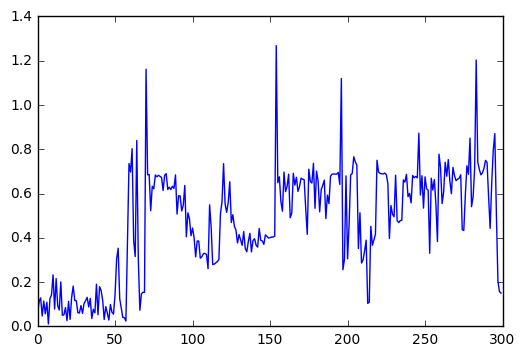

In [21]:
lfilt_1 = signal.lfilter(t,y,rms_acc);
lfilt_2 = signal.lfilter(t,y,rms_acc_2);
#for i in range (0, len(lfilt_1)):
#    lfilt_1[i] = (lfilt_1[i] * 1e+3);
#for i in range (0, len(lfilt_2)):
#    lfilt_2[i] = (lfilt_2[i] * 1e+3);    
plt.plot(lfilt_1[700:1000])

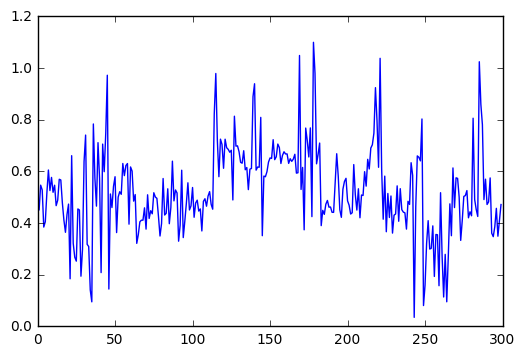

In [22]:
plt.plot(lfilt_2[400:700])

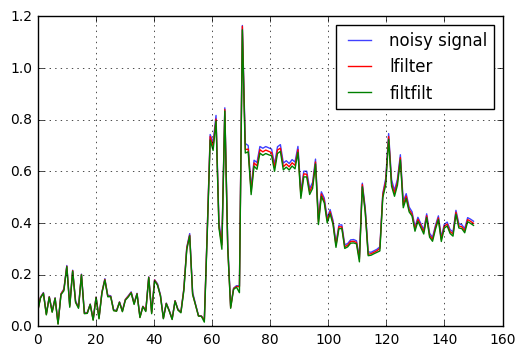

In [23]:
lin = np.linspace(0, 150, 150)
plt.figure
plt.plot(lin, rms_acc[700:850], 'b', alpha = 0.75);
plt.plot(lin,lfilt_1[700:850], 'r',lin,filt_1[700:850], 'g');#, lin, q[700:1000], 'g');
plt.legend(('noisy signal', 'lfilter','filtfilt','median'), loc='best');
plt.grid(True);
plt.show();

In [24]:
len(filter_rms)

1624

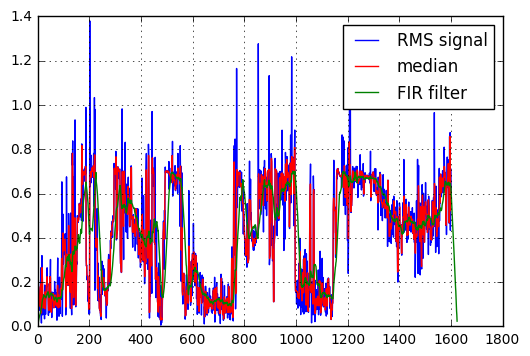

In [25]:
lin2 = np.linspace(0, 1600, 1600)
lin3 = np.linspace(0, 1624, 1624);
plt.figure
plt.plot(lin2, rms_acc, 'b');
plt.plot(lin2, q, 'r', lin3, filter_rms, 'g');
plt.legend(('RMS signal', 'median', 'FIR filter'), loc = 'best');
plt.grid(True);
plt.show();

In [26]:
fft_1 = np.fft.fft(rms_acc);
fft_2 = np.fft.fft(rms_acc_2);
len(fft_1)

1600

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


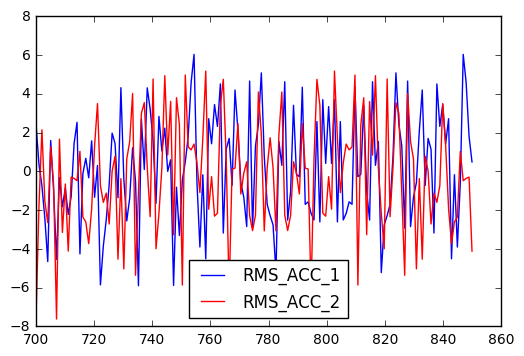

In [27]:
lin4 = np.linspace(700, 850, 150)
plt.figure
plt.plot(lin4, fft_1[700:850], 'b')
plt.plot(lin4, fft_2[700:850], 'r')
plt.legend(('RMS_ACC_1', 'RMS_ACC_2'), loc = 'best');
plt.show();

In [30]:

frame = 300;
stepsize = 150;
vr1  = [];
vr2 = [];
mn1 = [];
mn2 = [];
vr_acc_x_1 = [];
vr_acc_y_1 = [];
vr_acc_z_1 = [];
mn_acc_x_1 = [];
mn_acc_y_1 = [];
mn_acc_z_1 = [];

for cnt in range (0, len(acc_x_1), stepsize):
    dt = acc_x_1[cnt:cnt+frame];
    dt2 = acc_y_1[cnt:cnt+frame];
    dt3 = acc_z_1[cnt:cnt+frame];
    var_acc_x_1 = np.var(dt, axis = 0)
    var_acc_y_1 = np.var(dt2, axis = 0)
    var_acc_z_1 = np.var(dt3, axis = 0)
    
    vr_acc_x_1.append(var_acc_x_1);
    vr_acc_y_1.append(var_acc_y_1);
    vr_acc_z_1.append(var_acc_z_1);
        
    mean_acc_x_1 = np.mean(dt, axis = 0)
    mean_acc_y_1 = np.mean(dt2, axis = 0)
    mean_acc_z_1 = np.mean(dt3, axis = 0)
    
    mn_acc_x_1.append(mean_acc_x_1);
    mn_acc_y_1.append(mean_acc_y_1);
    mn_acc_z_1.append(mean_acc_z_1);

for count in range (0,4300, stepsize):
    dt =  rms_acc[count:count + frame];
    dt2 = rms_acc_2[count:count + frame];
    var1 = np.var(dt, axis = 0);
    var2 = np.var(dt2, axis = 0);
    mean1 = np.mean(dt, axis = 0);
    mean2 = np.mean(dt2, axis = 0);
    
    vr1.append(var1);
    vr2.append(var2);
    mn1.append(mean1);
    mn2.append(mean2);
    
    
# vr1 = variance of rms acc1
# vr2 = variance of rms acc2
# mn1 = mean of rms acc1
# mn2 = mean of rms acc1

#vr_acc_x_1
#vr_acc_y_1
#vr_acc_z_1

#mn_acc_x_1
#mn_acc_y_1
#mn_acc_z_1


#vr_acc_x_2
#vr_acc_y_2
#vr_acc_z_2

#mn_acc_x_2
#mn_acc_y_2
#mn_acc_z_2


#ln = np.linspace(0,len(vr_acc_x_1),len(vr_acc_x_1));    
#plt.figure
#plt.plot(ln, vr_acc_x_1, 'b', ln, vr_acc_y_1, 'r', ln, vr_acc_z_1, 'g');
#plt.legend(('Variance of acc x','Variance of acc y', 'Variance of acc z'), loc = 'best');
#plt.show()
        

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


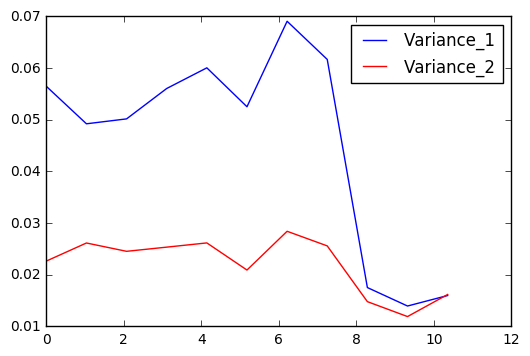

In [31]:
ln = np.linspace(0,len(vr1),len(vr1));
plt.figure
plt.plot(ln,vr1,'b', ln, vr2, 'r');
plt.legend(('Variance_1','Variance_2'), loc = 'best');
plt.show()
